In [24]:
# Statistics modules
import scipy.stats as st

# Datetime class
from datetime import date
from datetime import datetime

import pandas as pd # dataframe manipulation
import numpy as np # linear algebra

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()   
sns.set(color_codes=True)

In [25]:
crime_data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

## Data Cleaning

In [26]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [27]:
# So, I went through the explanations for each of the columns in this link https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8
# Found that these columns don't really have any contribution to our predictive analysis.
# Part 1-2 is vague, most of the entries in Cross Street is NaN, Mocodes doesn't have any meaning to our study.

crime_data = crime_data.drop(columns=['Part 1-2', 'Cross Street', 'Mocodes'])

In [28]:
# Since age of the victims is a vital feature to our study, it wouldn't make sense to have Age = 0 (according to the official documentation means the age was unknown)

crime_data = crime_data.drop(crime_data[crime_data['Vict Age'] == 0].index)

In [29]:
# Checking for number of null values across each column

crime_data.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Crm Cd                 0
Crm Cd Desc            0
Vict Age               0
Vict Sex              30
Vict Descent          29
Premis Cd              0
Premis Desc          182
Weapon Used Cd    349955
Weapon Desc       349955
Status                 0
Status Desc            0
Crm Cd 1               5
Crm Cd 2          561755
Crm Cd 3          606851
Crm Cd 4          608654
LOCATION               0
LAT                    0
LON                    0
dtype: int64

In [30]:
crime_data.shape

(608710, 25)

In [31]:
# Checking for unique values across columns. DR_NO can be used as PRIMARY KEY and/or UNIQUE KEY

crime_data.nunique()

DR_NO             608710
Date Rptd           1364
DATE OCC            1364
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1186
Crm Cd               135
Crm Cd Desc          135
Vict Age             102
Vict Sex               4
Vict Descent          20
Premis Cd            310
Premis Desc          303
Weapon Used Cd        79
Weapon Desc           79
Status                 6
Status Desc            6
Crm Cd 1             136
Crm Cd 2             119
Crm Cd 3              36
Crm Cd 4               6
LOCATION           59221
LAT                 5283
LON                 4957
dtype: int64

In [32]:
# Checking for distinct categories of victim's sex

crime_data['Vict Sex'].value_counts()

M    306916
F    294312
X      7365
H        87
Name: Vict Sex, dtype: int64

In [33]:
# The study will prove most effective if we have only two categories of sex. 'X' means the sex is unknown and I don't have any idea what 'H' means.

crime_data = crime_data.drop(crime_data[crime_data['Vict Sex'] == 'X'].index)
crime_data = crime_data.drop(crime_data[crime_data['Vict Sex'] == 'H'].index)

In [34]:
crime_data.nunique()

DR_NO             601258
Date Rptd           1364
DATE OCC            1364
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1185
Crm Cd               135
Crm Cd Desc          135
Vict Age             101
Vict Sex               2
Vict Descent          20
Premis Cd            310
Premis Desc          303
Weapon Used Cd        79
Weapon Desc           79
Status                 6
Status Desc            6
Crm Cd 1             136
Crm Cd 2             119
Crm Cd 3              36
Crm Cd 4               6
LOCATION           59139
LAT                 5283
LON                 4957
dtype: int64

In [35]:
# Checking for distinct categories of victim's descent. According to the documentation, there should be 19 distinct categories.

crime_data['Vict Descent'].value_counts()

H    243458
W    152916
B    113739
O     53438
A     17374
X      6002
K      4270
F      3301
C      3075
J      1119
V       820
I       759
Z       407
P       214
U       134
D        59
G        55
L        48
S        40
-         1
Name: Vict Descent, dtype: int64

In [36]:
# Dropped the 'X' and '-' descent categories. Again 'X' means unknown descent and '-' is probably a typographic error.

crime_data = crime_data.drop(crime_data[crime_data['Vict Descent'] == 'X'].index)
crime_data = crime_data.drop(crime_data[crime_data['Vict Descent'] == '-'].index)

In [37]:
crime_data.shape

(595255, 25)

In [38]:
# Checking for the datatypes of each column. Date Rptd and DATE OCC is supposed to be datetime while TIME OCC is supposed to be also supposed to be datetime

crime_data.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Crm Cd              int64
Crm Cd Desc        object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
LAT               float64
LON               float64
dtype: object

In [39]:
crime_data['Date Rptd'] = pd.to_datetime(crime_data['Date Rptd'])
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])
crime_data['TIME OCC'] = crime_data['TIME OCC'].astype('str')
crime_data['TIME OCC'] = crime_data['TIME OCC'].str.zfill(4)
crime_data['TIME OCC'] = pd.to_datetime(crime_data['TIME OCC'], format='%H%M').dt.time

In [40]:
# Renaming columns with more comprehensible names.

crime_data.rename(columns = {'DR_NO':'Div_Records_No', 'Date Rptd': 'Date reported', 'DATE OCC': 'Assault date', 'TIME OCC': 'Assault time', 
                             'AREA': 'Geographic area', 'AREA NAME': 'Area name', 'Rpt Dist No': 'Reported District No',
                             'Crm Cd': 'Crime committed', 'Crm Cd Desc': 'Crime description', 'Vict Age': 'Victim\'s age',
                             'Vict Sex': 'Victim\'s sex', 'Vict Descent': 'Victim\'s race', 'Premis Cd': 'Crime location code',
                             'Premis Desc': 'Crime location', 'Weapon Used Cd': 'Assault weapon code', 'Weapon Desc': 'Assault weapon',
                             'Status': 'Status code', 'Status Desc': 'Investigation status', 'Crm Cd 1': 'Crime code 1', 
                             'Crm Cd 2': 'Crime code 2', 'Crm Cd 3': 'Crime code 3', 'Crm Cd 4': 'Crime code 4',
                             'LOCATION': 'Address', 'LAT': 'Latitude', 'LON': 'Longitude'}, inplace = True)

In [41]:
crime_data.nunique()

Div_Records_No          595255
Date reported             1364
Assault date              1364
Assault time              1439
Geographic area             21
Area name                   21
Reported District No      1185
Crime committed            135
Crime description          135
Victim's age               101
Victim's sex                 2
Victim's race               18
Crime location code        310
Crime location             303
Assault weapon code         79
Assault weapon              79
Status code                  6
Investigation status         6
Crime code 1               136
Crime code 2               119
Crime code 3                36
Crime code 4                 6
Address                  59063
Latitude                  5283
Longitude                 4955
dtype: int64

In [42]:
# Analyzing the various types of crime and their counts.

types_of_crimes = crime_data['Crime description'].value_counts()
types_of_crimes.head()

BATTERY - SIMPLE ASSAULT                          62976
THEFT OF IDENTITY                                 50063
BURGLARY FROM VEHICLE                             47660
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    44077
INTIMATE PARTNER - SIMPLE ASSAULT                 40203
Name: Crime description, dtype: int64

In [43]:
# Analyzing crimes by where the crime took place

crimes_by_location = crime_data['Crime location'].value_counts()
crimes_by_location.head()

SINGLE FAMILY DWELLING                          133549
STREET                                          110687
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     93814
PARKING LOT                                      38560
SIDEWALK                                         32274
Name: Crime location, dtype: int64

In [44]:
# Analyzing crimes by the assault weapon used

assault_weapons_used = crime_data['Assault weapon'].value_counts()
assault_weapons_used.head()

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    141953
UNKNOWN WEAPON/OTHER WEAPON                        25182
VERBAL THREAT                                      19005
HAND GUN                                           14663
KNIFE WITH BLADE 6INCHES OR LESS                    5516
Name: Assault weapon, dtype: int64

In [45]:
# Analyzing crimes by the geographic area names

crimes_geographic_area = crime_data['Area name'].value_counts()
crimes_geographic_area.head(22)

Central        42620
77th Street    38594
Pacific        33873
Southwest      33710
Hollywood      32290
Southeast      30867
Olympic        29607
N Hollywood    29130
Wilshire       28223
Newton         28106
West LA        27707
Van Nuys       27364
Rampart        27291
West Valley    25251
Topanga        24666
Northeast      24360
Mission        24204
Devonshire     23373
Harbor         22974
Foothill       20561
Hollenbeck     20484
Name: Area name, dtype: int64

In [46]:
# Looking for any duplicates in the dataset.

# crime_data_d = crime_data.copy()
# crime_data_d.drop_duplicates(subset=None, inplace=True)

# crime_data_d.shape

# del crime_data_d


crime_data.duplicated().sum()

0

In [47]:
# Checking for the number of assault on each victim's descent classified by sex

first_contingency = pd.crosstab(crime_data['Victim\'s sex'], crime_data['Victim\'s race'])
first_contingency

Victim's race,A,B,C,D,F,G,H,I,J,K,L,O,P,S,U,V,W,Z
Victim's sex,,,,,,,,,,,,,,,,,,
F,8440,63954,1474,28,1629,29,123266,331,554,1980,34,22097,118,22,68,430,68769,155
M,8934,49784,1601,31,1672,26,120191,428,565,2290,14,31341,96,18,66,390,84145,252


In [48]:
# Checking for the number of investigation status classified by sex

second_contingency = pd.crosstab(crime_data['Victim\'s sex'], crime_data['Investigation status'])
second_contingency

Investigation status,Adult Arrest,Adult Other,Invest Cont,Juv Arrest,Juv Other,UNK
Victim's sex,,,,,,
F,28650,46269,216870,913,678,1
M,25088,32630,242642,1025,457,2


<Axes: >

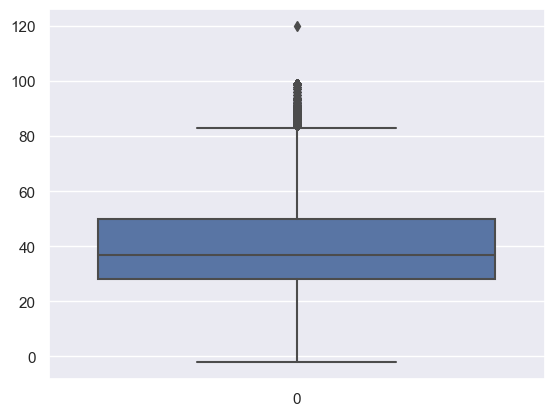

In [49]:
# Checking for outliers in age column

sns.boxplot(crime_data['Victim\'s age'])
# plt.gca().invert_xaxis()

In [50]:
crime_data[crime_data['Victim\'s age'] > 82].count()

# There are only 4275 records of victim's age above 82. I don't think this will be significant. Do you think we should include this in our study?

Div_Records_No          4275
Date reported           4275
Assault date            4275
Assault time            4275
Geographic area         4275
Area name               4275
Reported District No    4275
Crime committed         4275
Crime description       4275
Victim's age            4275
Victim's sex            4273
Victim's race           4273
Crime location code     4275
Crime location          4274
Assault weapon code     1175
Assault weapon          1175
Status code             4275
Investigation status    4275
Crime code 1            4275
Crime code 2             304
Crime code 3               6
Crime code 4               0
Address                 4275
Latitude                4275
Longitude               4275
dtype: int64

In [51]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595255 entries, 0 to 807376
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Div_Records_No        595255 non-null  int64         
 1   Date reported         595255 non-null  datetime64[ns]
 2   Assault date          595255 non-null  datetime64[ns]
 3   Assault time          595255 non-null  object        
 4   Geographic area       595255 non-null  int64         
 5   Area name             595255 non-null  object        
 6   Reported District No  595255 non-null  int64         
 7   Crime committed       595255 non-null  int64         
 8   Crime description     595255 non-null  object        
 9   Victim's age          595255 non-null  int64         
 10  Victim's sex          595225 non-null  object        
 11  Victim's race         595226 non-null  object        
 12  Crime location code   595255 non-null  float64       
 13 

In [28]:
crime_data.to_csv('crime_data.csv', index=False)